# Gradients

The [gradient of a function](https://en.wikipedia.org/wiki/Gradient) is a multivariate derivate with a crucial property -- the gradient points in the direction of the greatest rate of increase of the function. Many physical processes can be modeled by gradient and gradient flows, such as the flow of water down a mountain and the movement of charged particles in electromagnetic potentials.

As data scientists we use gradient descent to maximize or minimize various functions. For example, to find a good model fit we could attempt to minimize a loss function by following the gradient through many iterations in parameter-space. In particular, gradient descent can be used for [linear regression](https://en.wikipedia.org/wiki/Gradient_descent#Solution_of_a_linear_system). Let's take a close look.

If we want to minimize a multivariate function $f(\mathbf{a})$ -- typically a function of our parameters $\mathbf{a} = (a_1, \ldots, a_n)$ computed on our dataset -- we start with a guess $\mathbf{a}_1$ and compute the next step using the gradient, denoted by $\nabla f$:

$$ \mathbf{a}_2 = \mathbf{a}_1 - \lambda \nabla f(\mathbf{a}_1)$$

Note the differences in notation carefully -- bold face indicates a vector of parameters. The variable $\lambda$ is a parameter that controls the step size and is sometimes called the _learning rate_. Essentially we are taking a local linear approximation to our function, stepping a small bit in the direction of greatest change, and computing a new linear approximation to the function. We repeat the process until we converge to a minimum:

$$ \mathbf{a}_{n+1} = \mathbf{a}_n - \lambda \nabla f(\mathbf{a}_n)$$

This is the _gradient descent_ algorithm. It is used for a variety of machine learning models including some that you will learn about soon, such as logistic regression, support vector machines, and neural networks.

![](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png)


In [1]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

## Some helper functions
The following functions will generate data and polynomial values.

In [2]:
def function_to_optimize(x, y):
    return 0.5*(x ** 2 + y ** 2)

def gradient(x, y):
    f = function_to_optimize(x, y)
    return (x, y)

def gradient_descent(gradient_func, x0, y0, l=0.1):
    vector = np.array([x0, y0])
    g = gradient_func(x0, y0)
    return vector - l * np.array(gradient(x0, y0))

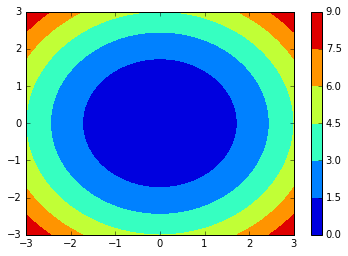

In [3]:
import numpy as np
import matplotlib.pyplot as plt

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)

Z = function_to_optimize(X, Y)

CS = plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

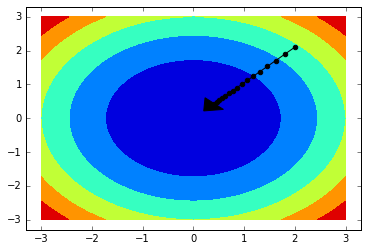

In [4]:
delta = 0.025
x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = function_to_optimize(X, Y)
CS = plt.contourf(X, Y, Z)

xs = [2]
ys = [2.1]
for i in range(15):
    x, y = gradient_descent(gradient, xs[-1], ys[-1])
    xs.append(x)
    ys.append(y)

plt.scatter(xs, ys, color="black")
plt.plot(xs, ys, color="black")
ax = plt.gca()
ax.arrow(xs[-2], ys[-2], xs[-1] - xs[-2], ys[-1] - ys[-2], head_width=0.5, head_length=0.3, fc='k', ec='k')
plt.show()

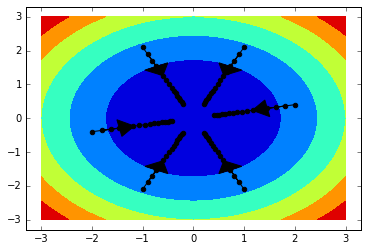

In [160]:
delta = 0.025
x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = function_to_optimize(X, Y)
CS = plt.contourf(X, Y, Z)

for (i, j) in [(-1, 2.1), (1, 2.1), (2, 0.4), (-2, -0.4), (-1, -2.1), (1, -2.1)]:
    xs = [i]
    ys = [j]
    for i in range(15):
        x, y = gradient_descent(gradient, xs[-1], ys[-1])
        xs.append(x)
        ys.append(y)
    
    ax = plt.scatter(xs, ys, color="black")
    ax = plt.gca()
    ax.arrow(xs[1], ys[1], xs[3] - xs[1], ys[3] - ys[1], head_width=0.5, head_length=0.3, fc='k', ec='k')
    plt.plot(xs, ys, color="black")

plt.show()

## Independent Practice

Here is a [nice example](http://math.stackexchange.com/questions/770622/gradient-descent-algorithm-always-converges-to-the-closest-local-optima) of when gradient descent fails. Let's implement these functions and see that gradient descent gets stuck.

The function is:
$$f(x, y) = \begin{cases}
2 x^2 & \quad \text{if $x \leq 1$}\\
2  & \quad \text{else}
\end{cases}$$

Walk throught the following code samples.

In [5]:
def func(x):
    if x <= 1:
        return 2 * x * x
    return 2

def gradient(x):
    if x <= 1:
        return 4 * x
    return 0

def gradient_descent(gradient_func, x, l=0.1):
    vector = np.array(x)
    g = gradient_func(x)
    return vector - l * np.array(gradient(x))


def iterate(gradient, x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        x = gradient_descent(gradient, xs[-1], l=0.1)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

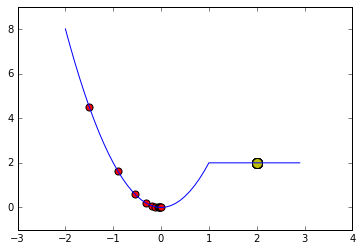

In [6]:
xs = np.arange(-2, 3, 0.1)
ys = map(func, xs)

plt.plot(xs, ys)

# Start gradient descent at x = -1.5
xs2, ys2 = iterate(gradient, -1.5, n=10)
plt.scatter(xs2, ys2, c='r', s=50)

# Start gradient descent at x = 2
xs2, ys2 = iterate(gradient, 2, n=10)
plt.scatter(xs2, ys2, c='y', s=100)


Gradient descent works on the left half of the function but not on the right portion because the derivative is flat. Our starting point of $x=2$ never moves and doesn't converge to the center.

### Exercise

Similarly, use the function $f(x) = x^4 - 2* x^2 + x +1$ and apply gradient descent. If you need help with the derivative, you can use [Wolfram Alpha](http://www.wolframalpha.com/calculators/derivative-calculator/).

Steps:
* Plot the function and identify the two minima
* Compute the derivative
* Using gradient descent, find two starting points that converge to different minima

Questions:
* What does this tell you about the end result of gradient descent?
* What are the implications for putting gradient descent into practice?

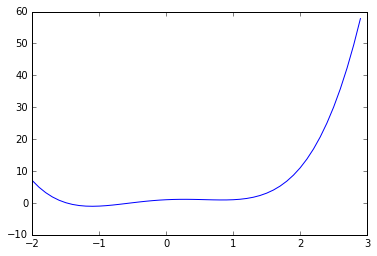

In [19]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

def gradient_descent_2(alpha, x, y, numIterations):
    m = x.shape[0]
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  
        print "iter %s | J: %.3f" % (iter, J)      
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  
    return theta

def func(x):
    return (x**2)**2-2*x**2 + x + 1


def gradient(x):
    return 4 * x^3-4*x+1 #MG: the ^ operator is not exponentiation in Python!  Do x**3 instead.

xs = np.arange(-2, 3, 0.1)
ys = map(func, xs)

plt.plot(xs, ys)



iter 0 | J: 1604.873
iter 1 | J: 1586.636
iter 2 | J: 1568.768
iter 3 | J: 1551.261
iter 4 | J: 1534.107
iter 5 | J: 1517.301
iter 6 | J: 1500.833
iter 7 | J: 1484.699
iter 8 | J: 1468.890
iter 9 | J: 1453.401
iter 10 | J: 1438.224
iter 11 | J: 1423.354
iter 12 | J: 1408.785
iter 13 | J: 1394.509
iter 14 | J: 1380.522
iter 15 | J: 1366.817
iter 16 | J: 1353.389
iter 17 | J: 1340.232
iter 18 | J: 1327.341
iter 19 | J: 1314.710
iter 20 | J: 1302.334
iter 21 | J: 1290.207
iter 22 | J: 1278.325
iter 23 | J: 1266.683
iter 24 | J: 1255.276
iter 25 | J: 1244.100
iter 26 | J: 1233.148
iter 27 | J: 1222.418
iter 28 | J: 1211.904
iter 29 | J: 1201.602
iter 30 | J: 1191.507
iter 31 | J: 1181.617
iter 32 | J: 1171.926
iter 33 | J: 1162.430
iter 34 | J: 1153.126
iter 35 | J: 1144.009
iter 36 | J: 1135.076
iter 37 | J: 1126.323
iter 38 | J: 1117.747
iter 39 | J: 1109.343
iter 40 | J: 1101.109
iter 41 | J: 1093.041
iter 42 | J: 1085.135
iter 43 | J: 1077.389
iter 44 | J: 1069.799
iter 45 | J: 1062.36

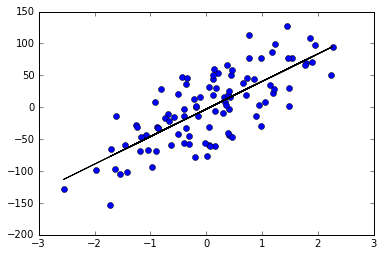

Done!


In [21]:
if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x]
    alpha = 0.01 
    theta = gradient_descent_2(alpha, x, y, 1000)

    # plot
    for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
    pylab.plot(x[:,1],y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print "Done!"

### Bonus Exercise

Use gradient descent to find the minimum of the function
$$f(x, y) = - e^{-x^2 - 4y^2}$$

MG: Score 4/5